# Libraries Imported

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

np.random.seed(42)
random.seed(42)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Data Loading and Data Understanding

In [2]:
df = pd.read_csv('listings1.csv')

In [3]:
#Removing '$' from price column.
df['price'] = df.price.str.lstrip('$').str.replace(',', '').astype('float')

# Exploratory Data Analysis (EDA)

# To visualize that where to invest in a property in Amsterdam to get the maximum number of returns from Airbnb.

Neighbourhood and Average Price comparison.

In [4]:
print(df['neighbourhood_cleansed'])

0       Oostelijk Havengebied - Indische Buurt
1                                 Centrum-Oost
2                                 Centrum-West
3                                 Centrum-West
4                                 Centrum-Oost
                         ...                  
5397                              Centrum-West
5398                              Centrum-West
5399                                Westerpark
5400                           Bijlmer-Centrum
5401                              Centrum-West
Name: neighbourhood_cleansed, Length: 5402, dtype: object


In [5]:
price_per_neighbourhood = df.groupby('neighbourhood_cleansed').price.mean()

In [6]:
price_per_neighbourhood

neighbourhood_cleansed
Bijlmer-Centrum                           146.000000
Bijlmer-Oost                              124.222222
Bos en Lommer                             136.713656
Buitenveldert - Zuidas                    124.272727
Centrum-Oost                              212.909091
Centrum-West                              186.792162
De Aker - Nieuw Sloten                    148.791667
De Baarsjes - Oud-West                    162.426396
De Pijp - Rivierenbuurt                   173.719852
Gaasperdam - Driemond                      99.428571
Geuzenveld - Slotermeer                   130.558442
IJburg - Zeeburgereiland                  180.923567
Noord-Oost                                136.033708
Noord-West                                128.609023
Oostelijk Havengebied - Indische Buurt    141.410891
Osdorp                                    118.459459
Oud-Noord                                 173.208511
Oud-Oost                                  154.532680
Slotervaart            

Text(0.5, 1.0, 'Neighbourhood vs Average Price Chart')

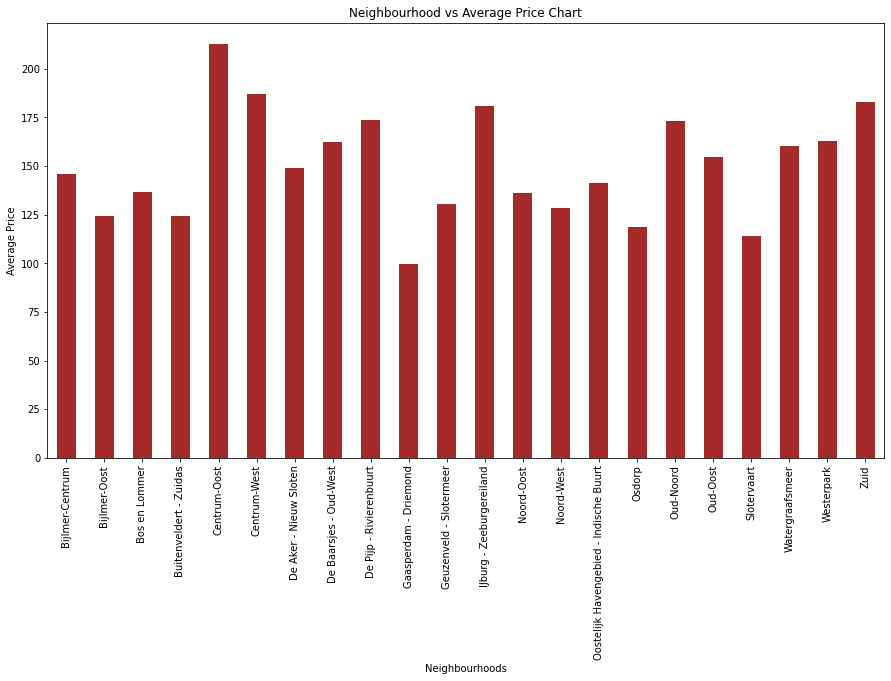

In [7]:
plt.figure(figsize=(15,8))
price_per_neighbourhood.plot(kind='bar', color='brown')
plt.xlabel('Neighbourhoods')
plt.ylabel('Average Price')
plt.title('Neighbourhood vs Average Price Chart')

Room Type and Average Price comparison.

In [8]:
print(df['room_type'])

0          Private room
1          Private room
2          Private room
3          Private room
4          Private room
             ...       
5397    Entire home/apt
5398    Entire home/apt
5399    Entire home/apt
5400    Entire home/apt
5401    Entire home/apt
Name: room_type, Length: 5402, dtype: object


In [9]:
price_per_room_type = df.groupby('room_type').price.mean()

In [10]:
price_per_room_type

room_type
Entire home/apt    192.383092
Hotel room         134.306818
Private room       122.452951
Shared room        111.368421
Name: price, dtype: float64

Text(0.5, 1.0, 'Room Type vs Average Price Chart')

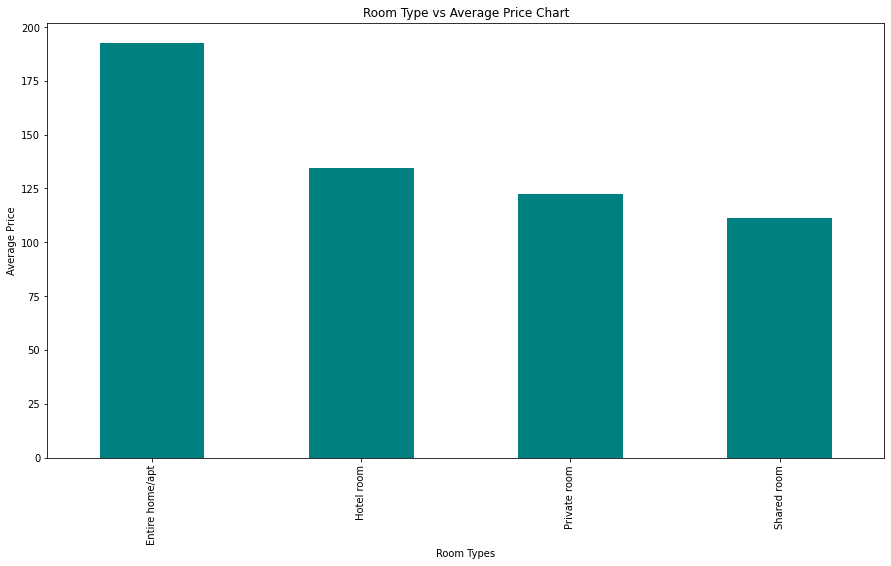

In [11]:
plt.figure(figsize=(15,8))
price_per_room_type.plot(kind='bar', color='teal')
plt.xlabel('Room Types')
plt.ylabel('Average Price')
plt.title('Room Type vs Average Price Chart')

Property Type and Average Price comparison.

In [12]:
print(df['property_type'])

0       Private room in rental unit
1         Private room in townhouse
2         Private room in houseboat
3       Private room in rental unit
4       Private room in rental unit
                   ...             
5397             Room in aparthotel
5398      Entire serviced apartment
5399     Entire condominium (condo)
5400     Entire condominium (condo)
5401             Room in aparthotel
Name: property_type, Length: 5402, dtype: object


In [13]:
price_per_property_type = df.groupby('property_type').price.mean()

In [14]:
price_per_property_type

property_type
Barn                                    85.000000
Boat                                   280.410256
Bus                                     50.000000
Camper/RV                               86.333333
Cave                                   400.000000
Entire cabin                           129.000000
Entire chalet                          107.500000
Entire condominium (condo)             178.138655
Entire cottage                         250.500000
Entire guest suite                     114.375000
Entire guesthouse                      153.230769
Entire home/apt                        110.000000
Entire loft                            234.781457
Entire place                           210.250000
Entire rental unit                     174.902322
Entire residential home                215.118694
Entire serviced apartment              246.048000
Entire townhouse                       232.802395
Entire vacation home                   140.000000
Entire villa                        

Text(0.5, 1.0, 'Property vs Average Price Chart')

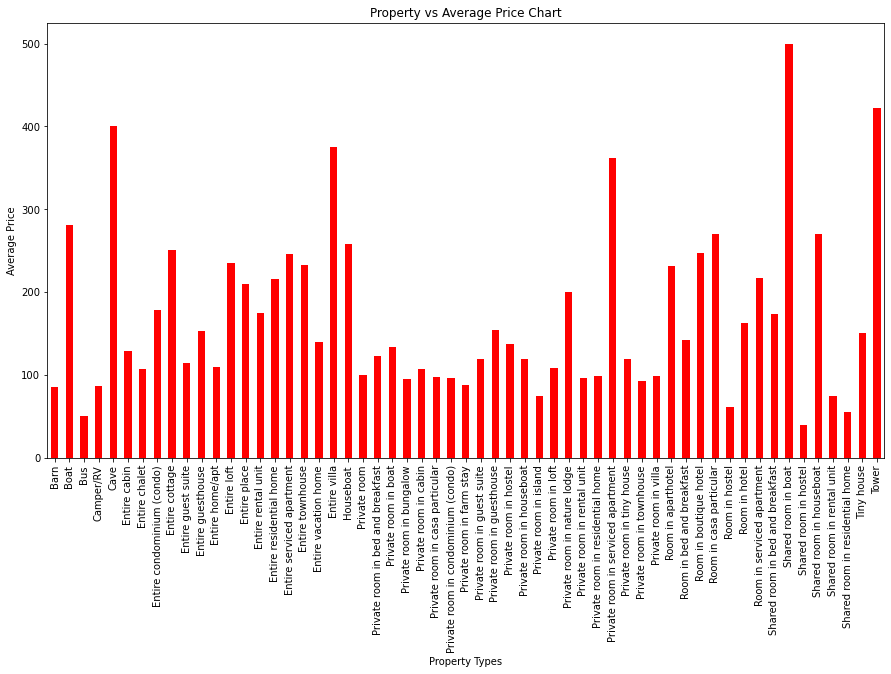

In [15]:
plt.figure(figsize=(15,8))
price_per_property_type.plot(kind='bar', color='red')
plt.xlabel('Property Types')
plt.ylabel('Average Price')
plt.title('Property vs Average Price Chart')

# To visualize that which Room Type is most and least expensive and come under which Property Type and Neighbourhood of Amsterdam.


Visualization of Room Type Distributions.

In [16]:
room_type_count = df.room_type.value_counts()

In [17]:
room_type_count

Entire home/apt    3584
Private room       1711
Hotel room           88
Shared room          19
Name: room_type, dtype: int64

<AxesSubplot:title={'center':'Room Type Distribution'}, ylabel='room_type'>

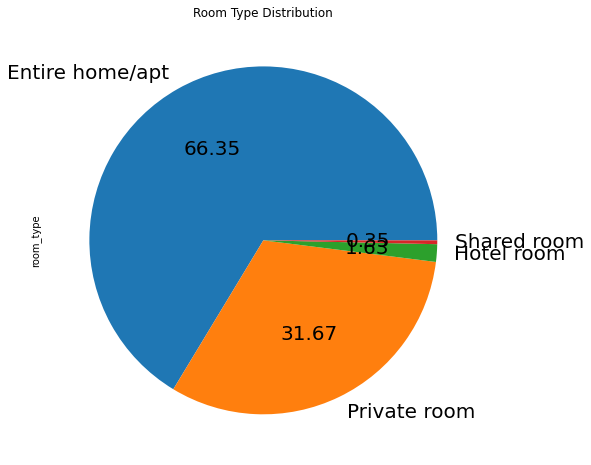

In [18]:
#Pie Chart.
room_type_count.plot.pie(figsize=(8, 8), fontsize = 20, autopct = '%.2f', title = 'Room Type Distribution')

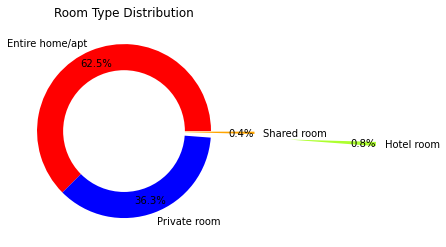

In [19]:
#Donut Chart.
room_type_labels = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
room_type_counts_labels = [2030, 1180, 25, 14]

colors = ['#FF0000', '#0000FF', '#ADFF2F', '#FFA500']
explode = (0, 0, 1.9, 0.5)
plt.pie(room_type_counts_labels, colors=colors, labels= room_type_labels, autopct='%1.1f%%', pctdistance=0.85, explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Room Type Distribution')
plt.show()

Property Type and Room Type compared with Price.

In [20]:
df.property_type.unique()

array(['Private room in rental unit', 'Private room in townhouse',
       'Private room in houseboat', 'Entire rental unit',
       'Entire guest suite', 'Boat', 'Private room in bed and breakfast',
       'Entire loft', 'Private room in residential home',
       'Private room in loft', 'Entire guesthouse',
       'Private room in boat', 'Private room in guest suite',
       'Entire townhouse', 'Room in boutique hotel',
       'Entire condominium (condo)', 'Entire residential home',
       'Entire serviced apartment', 'Private room in farm stay',
       'Houseboat', 'Room in bed and breakfast', 'Entire chalet',
       'Private room in guesthouse', 'Shared room in rental unit',
       'Private room in condominium (condo)',
       'Shared room in residential home', 'Private room in island',
       'Entire villa', 'Private room in tiny house',
       'Private room in villa', 'Barn', 'Private room in bungalow',
       'Private room in serviced apartment', 'Entire cabin',
       'Room in ho

In [21]:
df = df[df.property_type != 0]

In [22]:
property_type_count = df.property_type.value_counts()

In [23]:
property_type_count

Entire rental unit                     2283
Private room in rental unit             588
Entire residential home                 337
Private room in bed and breakfast       261
Entire condominium (condo)              238
Entire townhouse                        167
Entire loft                             151
Room in boutique hotel                  149
Private room in residential home        130
Entire serviced apartment               125
Houseboat                               101
Private room in townhouse                93
Private room in guest suite              91
Room in hotel                            91
Private room in houseboat                90
Boat                                     78
Private room in boat                     72
Private room in condominium (condo)      56
Private room in loft                     42
Room in bed and breakfast                28
Room in aparthotel                       24
Entire guest suite                       24
Room in hostel                  

Text(0, 0.5, 'Number of listings')

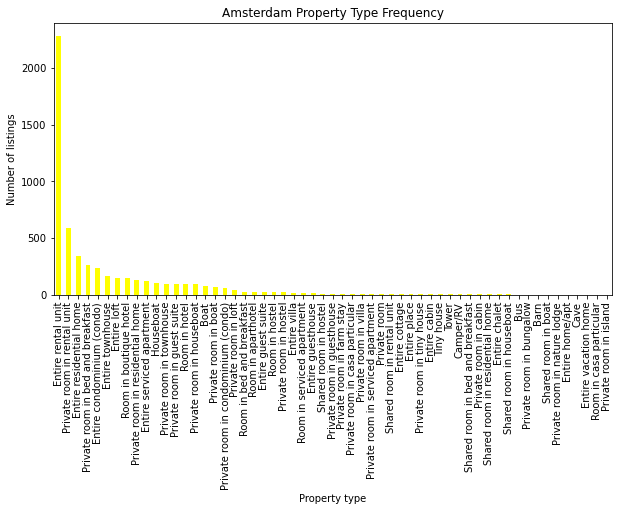

In [24]:
property_type_count.plot.bar(color = 'yellow', figsize =(10,5), title = 'Amsterdam Property Type Frequency')
plt.xlabel('Property type')
plt.ylabel('Number of listings')

In [25]:
prices_data = df.groupby(['property_type','room_type']).price.mean()

In [26]:
prices_data

property_type                    room_type      
Barn                             Entire home/apt     85.000000
Boat                             Entire home/apt    280.410256
Bus                              Entire home/apt     50.000000
Camper/RV                        Entire home/apt     86.333333
Cave                             Entire home/apt    400.000000
                                                       ...    
Shared room in houseboat         Shared room        270.500000
Shared room in rental unit       Shared room         75.000000
Shared room in residential home  Shared room         55.000000
Tiny house                       Entire home/apt    150.333333
Tower                            Entire home/apt    421.666667
Name: price, Length: 61, dtype: float64

Text(0.5, 1.0, 'Heatmap between Property Type and Room Type')

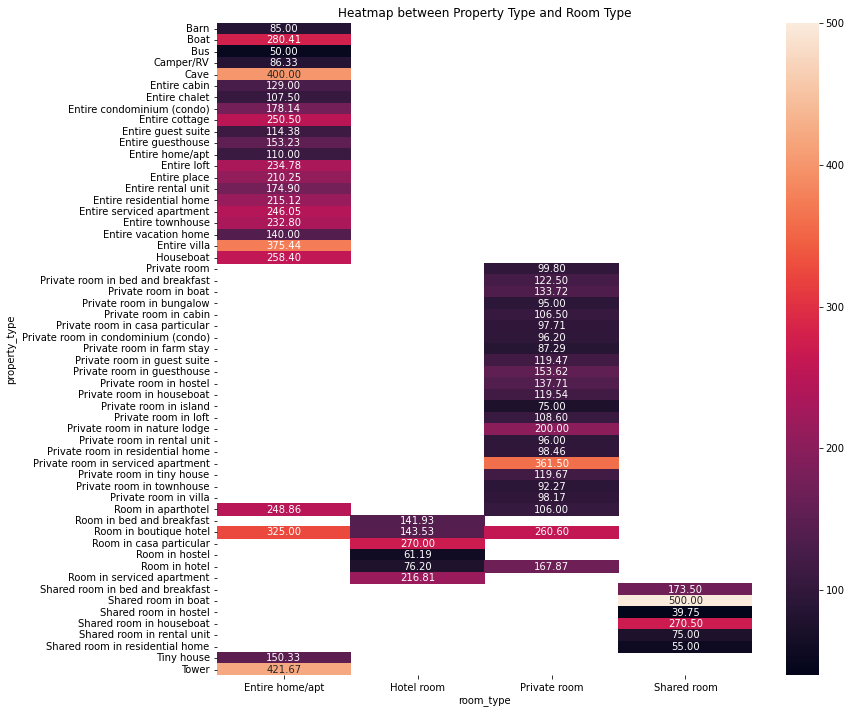

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(df.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".2f")
plt.title('Heatmap between Property Type and Room Type')

Neighbourhood Cleansed and Room Type compared with Price.

In [28]:
df.groupby(['neighbourhood_cleansed','room_type']).price.mean()

neighbourhood_cleansed  room_type      
Bijlmer-Centrum         Entire home/apt    181.100000
                        Private room        92.000000
Bijlmer-Oost            Entire home/apt    187.111111
                        Private room        61.333333
Bos en Lommer           Entire home/apt    148.603175
                                              ...    
Westerpark              Private room       128.904762
Zuid                    Entire home/apt    209.195312
                        Hotel room         104.600000
                        Private room       117.386364
                        Shared room         75.000000
Name: price, Length: 68, dtype: float64

Text(0.5, 1.0, 'Heatmap between Neighbourhood Cleansed and Room Type')

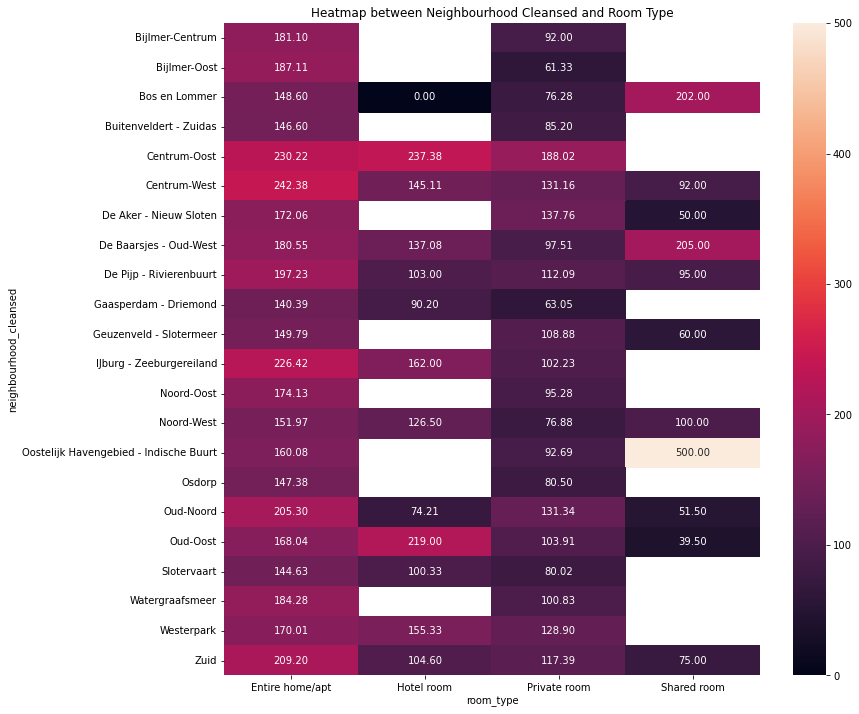

In [29]:
plt.figure(figsize=(12,12));
sns.heatmap(df.groupby(['neighbourhood_cleansed', 'room_type']).price.mean().unstack(),annot=True, fmt=".2f")
plt.title('Heatmap between Neighbourhood Cleansed and Room Type')

# To visualize that which listing id has good and bad Review Score Ratings on the basis of Neighbourhood, Property Type, Room Type and Bedrooms available in the individuals.


In [30]:
df.review_scores_rating.unique()

array([4.89, 4.44, 4.95, 4.88, 4.77, 4.7 , 4.91, 4.93, 4.86, 4.75, 4.97,
       4.87, 4.48, 4.78, 4.55, 4.83, 4.76, 4.58, 5.  , 4.5 , 4.65, 4.96,
       4.71, 4.81, 4.85, 4.52, 4.73, 4.67, 4.74, 4.94, 4.  , 4.64, 4.92,
       4.84, 4.61, 4.79, 4.53, 4.6 , 4.82, 4.72, 4.2 , 4.47, 4.41, 4.9 ,
       4.33, 4.8 , 4.51, 4.69, 4.98, 4.68, 4.63, 4.57, 4.39, 4.62,  nan,
       4.66, 4.4 , 4.43, 4.45, 4.19, 4.99, 4.21, 4.56, 4.59, 4.37, 4.32,
       4.07, 4.03, 4.14, 4.49, 4.3 , 4.54, 4.46, 4.35, 4.38, 4.42, 3.93,
       4.15, 4.27, 4.23, 4.24, 4.31, 3.5 , 4.34, 4.02, 4.29, 0.  , 4.25,
       4.1 , 4.12, 4.22, 4.17, 4.36, 4.11, 3.4 , 4.28, 3.91, 3.13, 3.33,
       4.26, 2.  , 3.  , 2.67, 4.05, 3.67, 3.43, 3.83, 3.44, 3.78, 3.29,
       3.71, 4.08, 3.69, 3.89, 2.75, 3.75, 3.86, 3.92, 3.6 , 3.64, 3.8 ])

In [31]:
df[['review_scores_rating']] = df[['review_scores_rating']].fillna(value=0)

Review Scores Rating validate with Neighbourhood Cleansed.

In [32]:
ratings_per_neighbourhood = df.groupby(['neighbourhood_cleansed', 'property_type']).review_scores_rating.mean()

In [33]:
ratings_per_neighbourhood.sort_values(ascending=False)

neighbourhood_cleansed   property_type                     
Noord-West               Entire cottage                        5.0
Gaasperdam - Driemond    Entire condominium (condo)            5.0
Zuid                     Private room in boat                  5.0
Buitenveldert - Zuidas   Entire townhouse                      5.0
                         Houseboat                             5.0
                                                              ... 
Centrum-Oost             Private room in serviced apartment    0.0
De Pijp - Rivierenbuurt  Private room in casa particular       0.0
Centrum-West             Room in casa particular               0.0
De Baarsjes - Oud-West   Entire vacation home                  0.0
Bijlmer-Centrum          Entire condominium (condo)            0.0
Name: review_scores_rating, Length: 436, dtype: float64

Text(0.5, 1.0, 'Reviews based on neighbourhood and price')

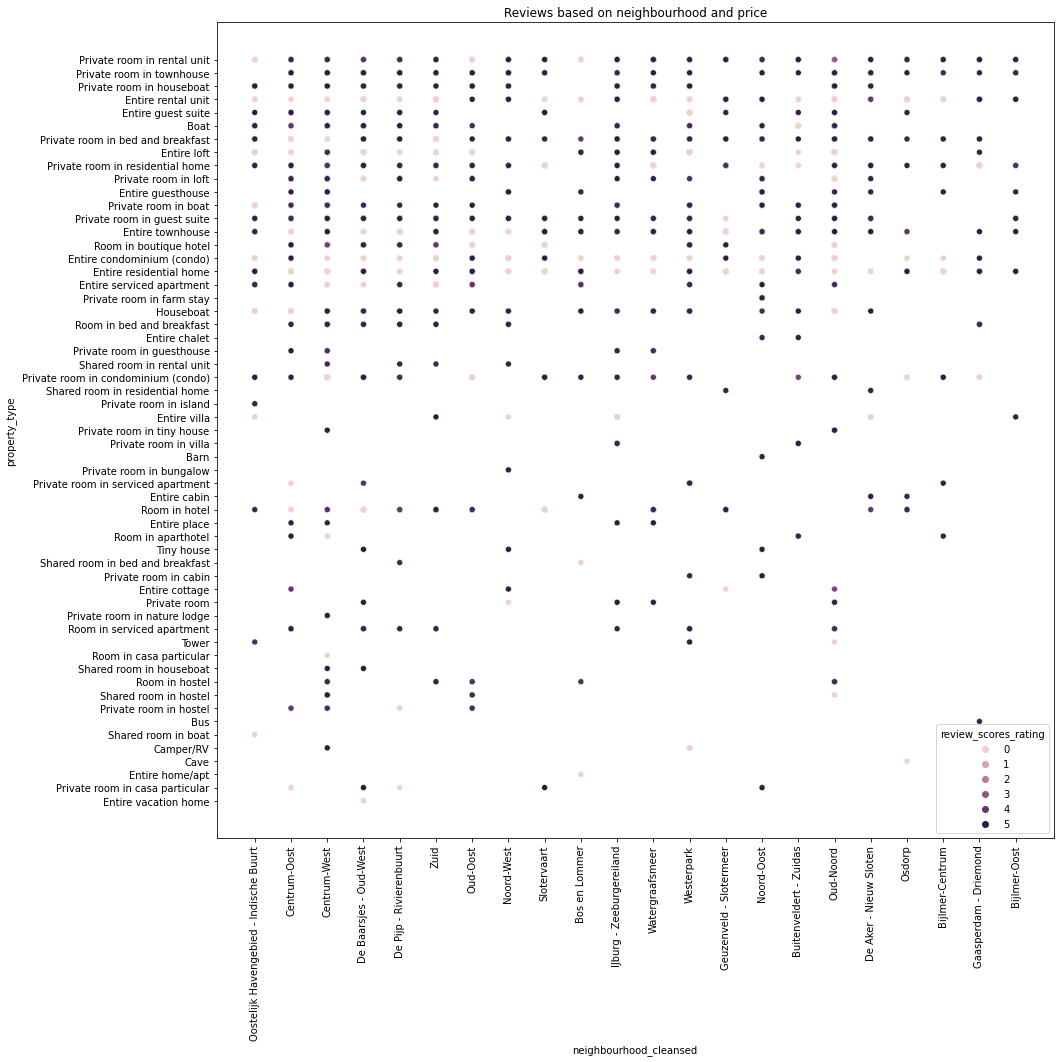

In [34]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x='neighbourhood_cleansed', y='property_type', hue='review_scores_rating', data=df)
plt.xticks(rotation=90)
plt.title('Reviews based on neighbourhood and price')

Review Scores Rating validate with Property Type.

In [35]:
ratings_per_property_type = df.groupby('property_type').review_scores_rating.mean()

In [36]:
ratings_per_property_type

property_type
Barn                                   4.890000
Boat                                   4.607564
Bus                                    4.670000
Camper/RV                              3.333333
Cave                                   0.000000
Entire cabin                           4.850000
Entire chalet                          4.730000
Entire condominium (condo)             3.787941
Entire cottage                         3.125000
Entire guest suite                     4.644583
Entire guesthouse                      4.854615
Entire home/apt                        0.000000
Entire loft                            4.367086
Entire place                           4.910000
Entire rental unit                     4.494052
Entire residential home                4.282730
Entire serviced apartment              4.000640
Entire townhouse                       4.336048
Entire vacation home                   0.000000
Entire villa                           3.151667
Houseboat                 

Text(0.5, 1.0, 'Property Type vs Average Rating Chart')

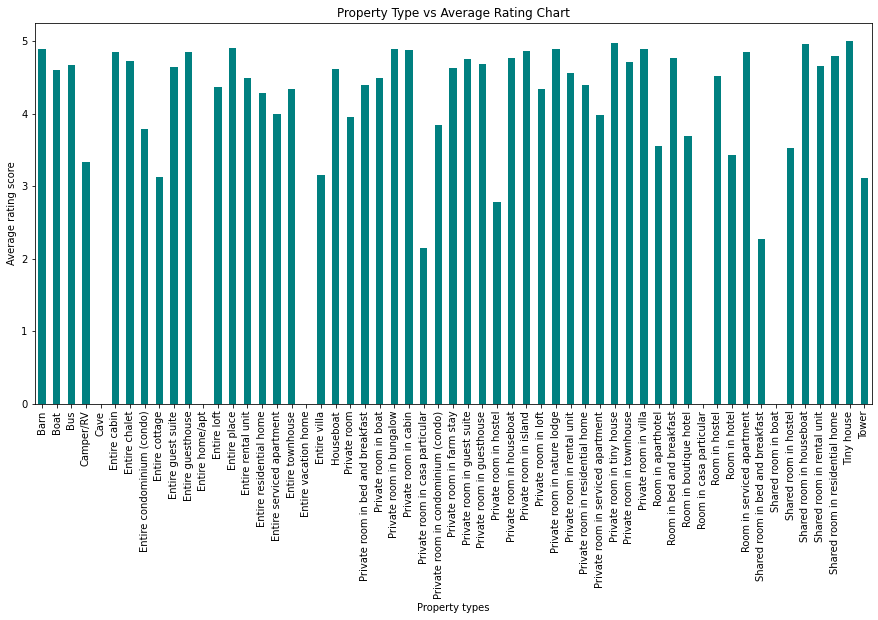

In [37]:
ratings_per_property_type.plot(kind='bar',color='teal', figsize=(15,7))
plt.xlabel('Property types')
plt.ylabel('Average rating score')
plt.title('Property Type vs Average Rating Chart')

Review Scores Rating validate Room Type and Bedrooms.

In [38]:
ratings_per_bedrooms = df.groupby(['room_type', 'bedrooms']).review_scores_rating.mean()

In [39]:
ratings_per_bedrooms

room_type        bedrooms
Entire home/apt  1.0         4.383085
                 2.0         4.412051
                 3.0         4.390812
                 4.0         4.276199
                 5.0         4.334667
                 6.0         2.842000
                 7.0         4.810000
                 8.0         4.733333
                 10.0        4.660000
Hotel room       1.0         4.567917
                 2.0         4.788333
Private room     1.0         4.346981
                 2.0         4.468263
                 3.0         4.815000
                 7.0         4.790000
                 10.0        4.875000
Shared room      1.0         3.731579
Name: review_scores_rating, dtype: float64

Text(0.5, 1.0, 'Room_type, Bedrooms vs Average Rating Chart')

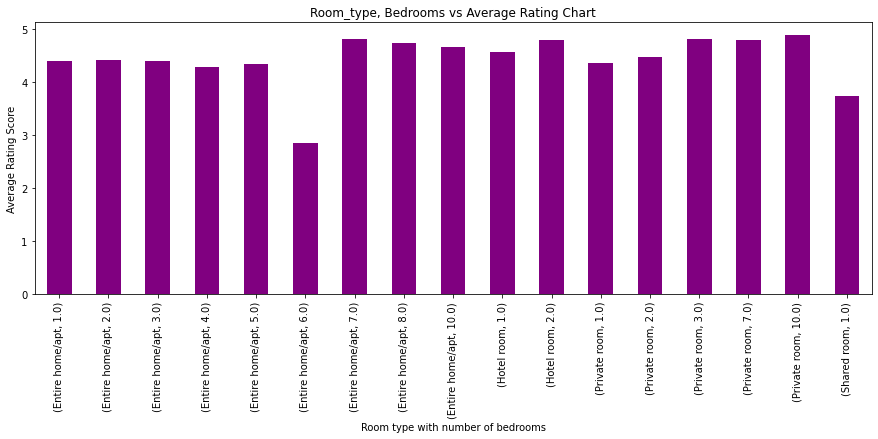

In [40]:
plt.figure(figsize=(15, 5))
ratings_per_bedrooms.plot(kind='bar',color='purple')
plt.xlabel('Room type with number of bedrooms')
plt.ylabel('Average Rating Score')
plt.title('Room_type, Bedrooms vs Average Rating Chart')

# Data Pre-Processing

# Data Cleaning, Feature Engineering, Data Reduction, Data Transformation and EDA

# To predict and validate the price using different algorithms.

In [41]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20211104024252,2021-11-04,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,4.98,4.68,4.81,0363 5F3A 5684 6750 D14D,t,1,0,1,0,2.83
1,20168,https://www.airbnb.com/rooms/20168,20211104024252,2021-11-04,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,3.57
2,27886,https://www.airbnb.com/rooms/27886,20211104024252,2021-11-04,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,4.92,4.90,4.80,0363 974D 4986 7411 88D8,t,1,0,1,0,2.13
3,28871,https://www.airbnb.com/rooms/28871,20211104024252,2021-11-04,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,4.94,4.97,4.82,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.62
4,29051,https://www.airbnb.com/rooms/29051,20211104024252,2021-11-04,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,...,4.90,4.86,4.75,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,5.52


In [42]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [43]:
df.isnull().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
name                                              0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               468
Length: 74, dtype: int64

In [44]:
df.isnull().sum().sum()

33323

In [45]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5.402000e+03,5.402000e+03,5.402000e+03,5401.000000,5401.000000,0.0,5402.000000,5402.000000,5402.000000,0.0,...,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,5402.000000,5402.000000,5402.000000,5402.000000,4934.000000
mean,2.514490e+07,2.021110e+13,8.717240e+07,3.004444,3.004444,NaN,52.367058,4.891532,2.949648,NaN,...,4.754292,4.878600,4.885681,4.781655,4.642645,2.188078,1.129211,0.920770,0.017401,1.416088
std,1.635076e+07,0.000000e+00,1.133920e+08,32.186522,32.186522,NaN,0.016975,0.036314,1.467812,NaN,...,0.311728,0.220496,0.225279,0.235271,0.290261,3.160899,2.050005,2.309993,0.214441,2.756979
min,2.818000e+03,2.021110e+13,3.159000e+03,0.000000,0.000000,NaN,52.290340,4.755710,0.000000,NaN,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.104046e+07,2.021110e+13,8.820505e+06,1.000000,1.000000,NaN,52.356630,4.869590,2.000000,NaN,...,4.670000,4.850000,4.865000,4.670000,4.530000,1.000000,0.000000,0.000000,0.000000,0.310000
50%,2.367064e+07,2.021110e+13,2.972255e+07,1.000000,1.000000,NaN,52.366595,4.888670,2.000000,NaN,...,4.850000,4.950000,4.960000,4.840000,4.680000,1.000000,1.000000,0.000000,0.000000,0.660000
75%,3.983068e+07,2.021110e+13,1.292072e+08,2.000000,2.000000,NaN,52.376540,4.908608,4.000000,NaN,...,4.970000,5.000000,5.000000,4.970000,4.810000,2.000000,1.000000,1.000000,0.000000,1.650000
max,5.314008e+07,2.021110e+13,4.301123e+08,2120.000000,2120.000000,NaN,52.425120,5.026430,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,22.000000,22.000000,21.000000,4.000000,102.600000


In [46]:
df = df.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'bathrooms',
       'bathrooms_text', 'beds', 'amenities',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'])

In [47]:
df

,id,latitude,longitude,room_type,accommodates,bedrooms,price,number_of_reviews
0,2818,52.364350,4.943580,Private room,2,1.0,59.0,282
1,20168,52.364070,4.893930,Private room,2,1.0,106.0,339
2,27886,52.387610,4.891880,Private room,2,1.0,135.0,226
3,28871,52.367750,4.890920,Private room,2,1.0,75.0,364
4,29051,52.365840,4.891110,Private room,1,1.0,55.0,509
...,...,...,...,...,...,...,...,...
5397,53121415,52.373872,4.900818,Entire home/apt,6,2.0,251.0,0
5398,53124758,52.372290,4.891089,Entire home/apt,3,NaN,215.0,0
5399,53127475,52.388880,4.880210,Entire home/apt,2,1.0,140.0,0
5400,53131052,52.315201,4.954658,Entire home/apt,2,1.0,176.0,0


In [48]:
df.isnull().sum()

id                     0
latitude               0
longitude              0
room_type              0
accommodates           0
bedrooms             321
price                  0
number_of_reviews      0
dtype: int64

In [49]:
df.isnull().sum().sum()

321

In [50]:
df[['bedrooms']] = df[['bedrooms']].fillna(value=0)

In [51]:
df

,id,latitude,longitude,room_type,accommodates,bedrooms,price,number_of_reviews
0,2818,52.364350,4.943580,Private room,2,1.0,59.0,282
1,20168,52.364070,4.893930,Private room,2,1.0,106.0,339
2,27886,52.387610,4.891880,Private room,2,1.0,135.0,226
3,28871,52.367750,4.890920,Private room,2,1.0,75.0,364
4,29051,52.365840,4.891110,Private room,1,1.0,55.0,509
...,...,...,...,...,...,...,...,...
5397,53121415,52.373872,4.900818,Entire home/apt,6,2.0,251.0,0
5398,53124758,52.372290,4.891089,Entire home/apt,3,0.0,215.0,0
5399,53127475,52.388880,4.880210,Entire home/apt,2,1.0,140.0,0
5400,53131052,52.315201,4.954658,Entire home/apt,2,1.0,176.0,0


Text(0.5, 1.0, 'Price Frequency')

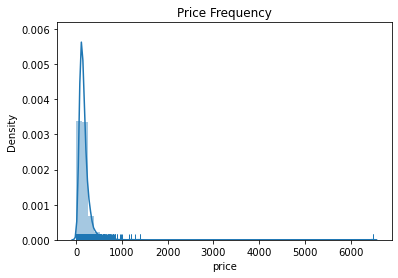

In [52]:
sns.distplot(df['price'], rug = True)
plt.title('Price Frequency')

In [53]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [54]:
df.room_type.value_counts()

Entire home/apt    3584
Private room       1711
Hotel room           88
Shared room          19
Name: room_type, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='room_type'>

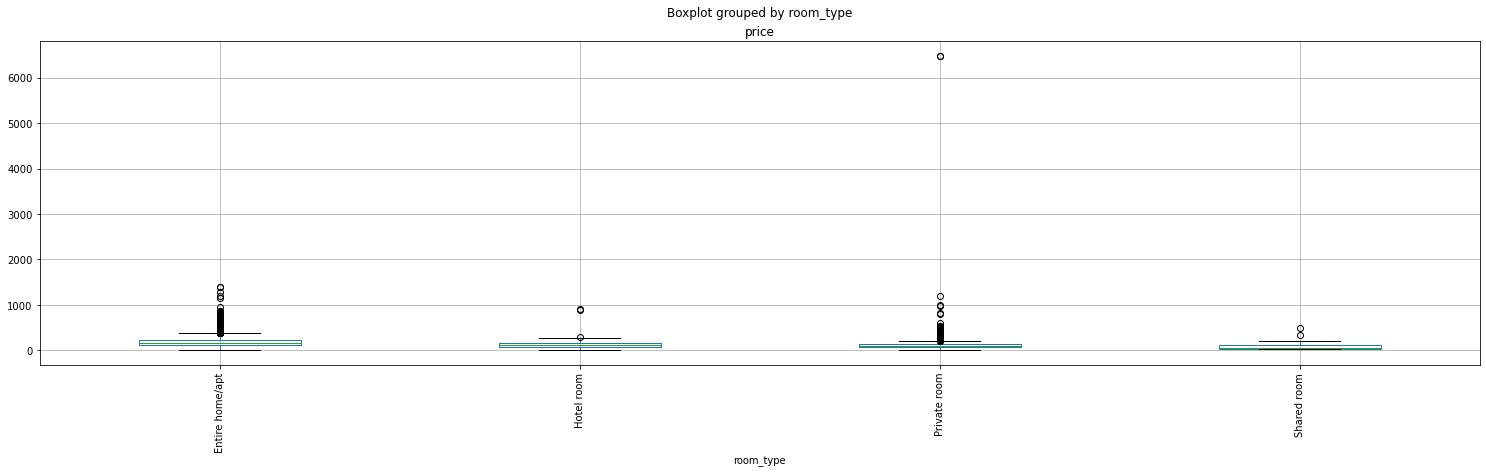

In [55]:
df.boxplot(column='price', by = 'room_type', figsize=(25,6), rot = 90)

Text(0.5, 1.0, 'Longitude & Latitude along with Price')

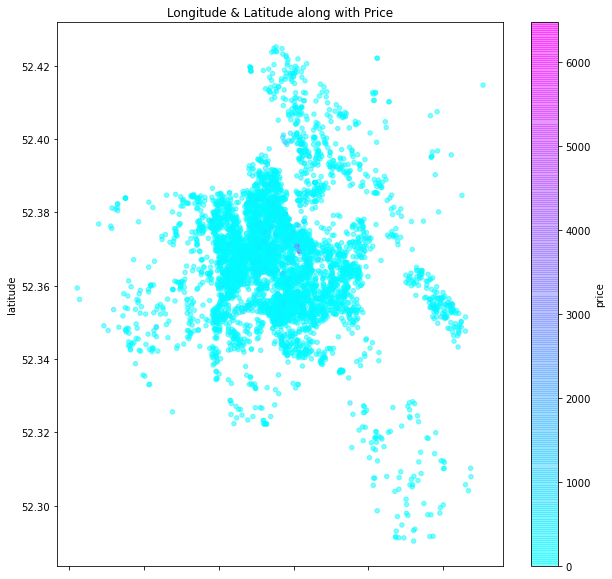

In [56]:
df.plot.scatter(x = 'longitude' , y = 'latitude', c = 'price', figsize=(10,10), cmap='cool', alpha=0.5)
plt.title('Longitude & Latitude along with Price')

Text(0.5, 1.0, 'Longitude and Latitude along with Price < 200')

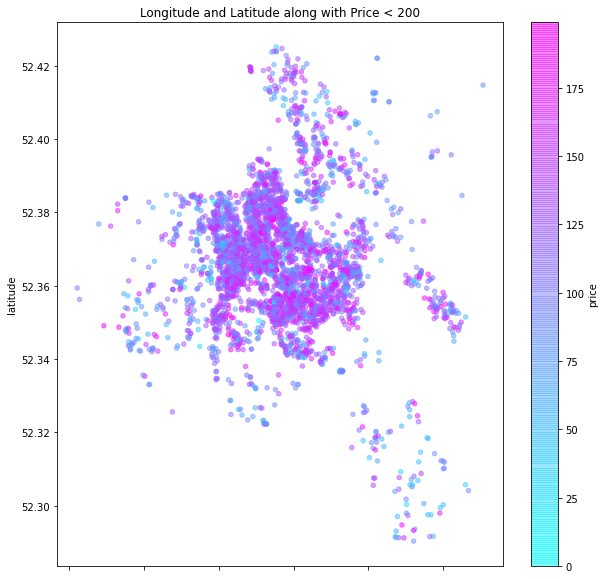

In [57]:
df[df['price']<200].plot.scatter(x = 'longitude' , y = 'latitude', c = 'price', figsize=(10,10), cmap='cool', alpha=0.5)
plt.title('Longitude and Latitude along with Price < 200')

In [58]:
import folium
from folium import plugins
from folium.plugins import HeatMap

Netherland = folium.Map(location=[53.35917, 7.10833], zoom_start = 3)
heat_data = [[row['latitude'],row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(Netherland)
Netherland

Text(0.5, 1.0, 'Price vs Number of Reviews')

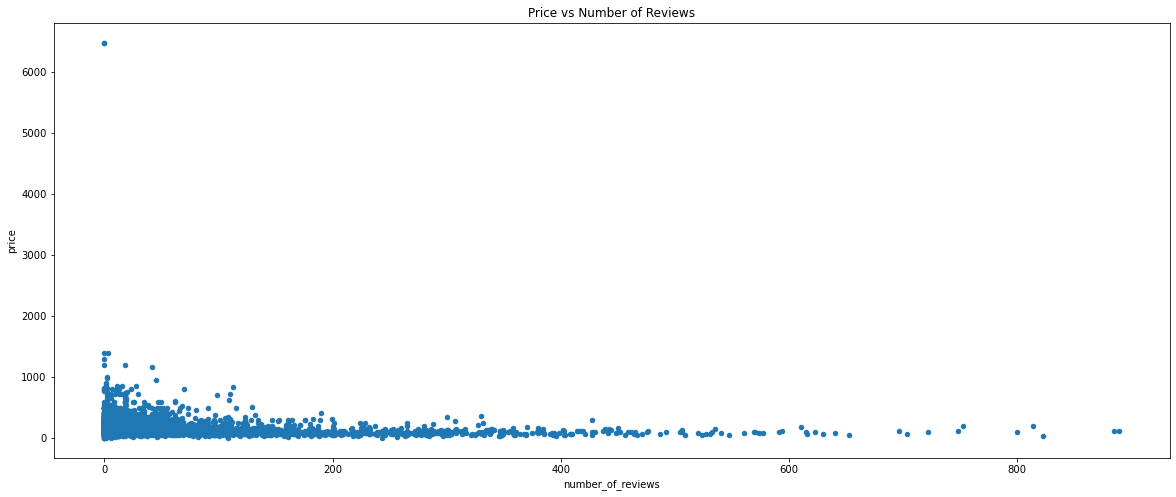

In [59]:
df.plot.scatter(x = 'number_of_reviews', y = 'price', figsize=(20,8))
plt.title('Price vs Number of Reviews')

Text(0.5, 1.0, 'Price vs log(reviews)')

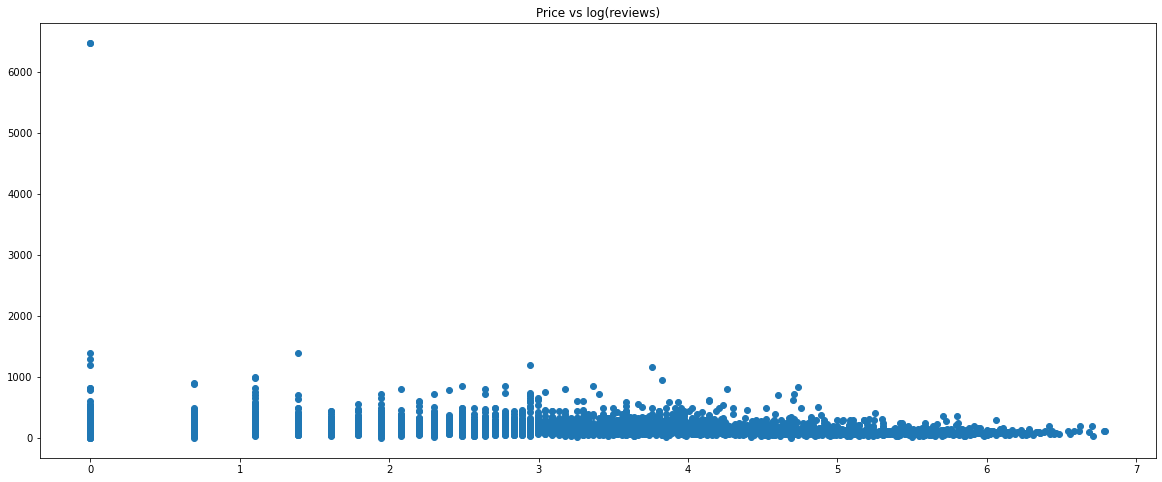

In [60]:
plt.figure(figsize=(20,8))
plt.scatter(np.log(1+df['number_of_reviews']), df['price'])
plt.title('Price vs log(reviews)')

Text(0.5, 1.0, 'Price vs Bedrooms')

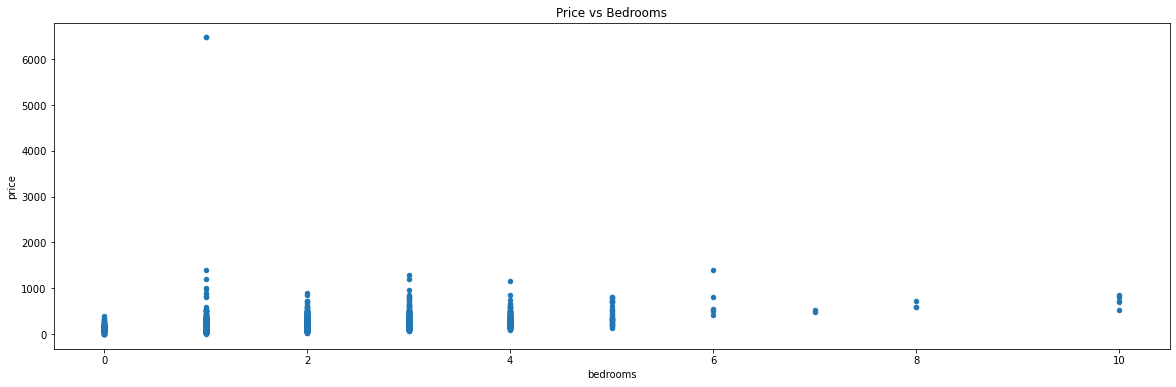

In [61]:
df.plot.scatter(x = 'bedrooms', y = 'price', figsize=(20,6))
plt.title('Price vs Bedrooms') 

Text(0.5, 1.0, 'Price vs Accomodates')

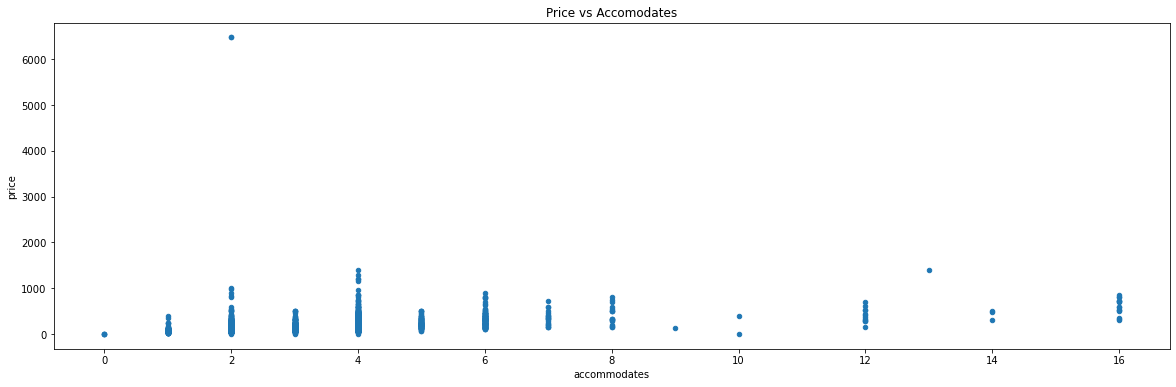

In [62]:
df.plot.scatter(x = 'accommodates', y = 'price', figsize=(20,6))
plt.title('Price vs Accomodates') 

In [63]:
df['logreviews'] = np.log(1 + df['number_of_reviews'])

In [64]:
df.head()

,id,latitude,longitude,room_type,accommodates,bedrooms,price,number_of_reviews,logreviews
0,2818,52.36435,4.94358,Private room,2,1.0,59.0,282,5.645447
1,20168,52.36407,4.89393,Private room,2,1.0,106.0,339,5.828946
2,27886,52.38761,4.89188,Private room,2,1.0,135.0,226,5.424950
3,28871,52.36775,4.89092,Private room,2,1.0,75.0,364,5.899897
4,29051,52.36584,4.89111,Private room,1,1.0,55.0,509,6.234411


In [65]:
df.columns

Index(['id', 'latitude', 'longitude', 'room_type', 'accommodates', 'bedrooms',
       'price', 'number_of_reviews', 'logreviews'],
      dtype='object')

Text(0.5, 1.0, 'Correlogram between Features')

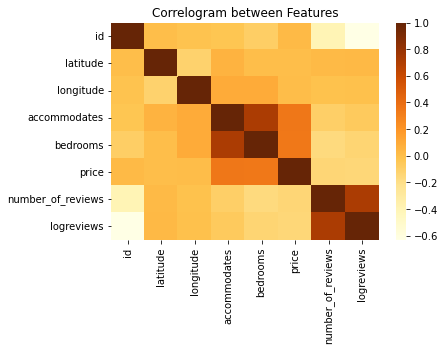

In [66]:
corr1=df.corr()
sns.heatmap(corr1, cmap="YlOrBr")
plt.title('Correlogram between Features')

Text(0.5, 1.0, 'Correlation between Features')

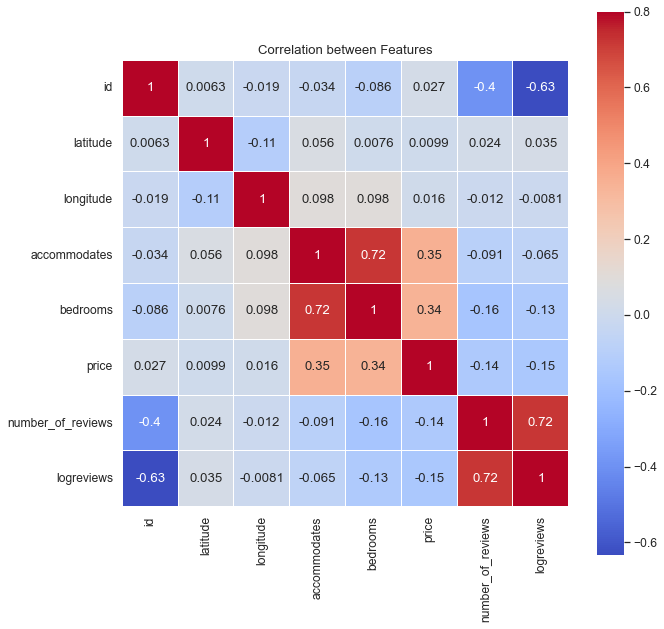

In [67]:
corrMatrix=df[['id', 'latitude', 'longitude', 'room_type', 'accommodates', 'bedrooms', 'price', 'number_of_reviews', 'logreviews']].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='coolwarm',linecolor="white")
plt.title('Correlation between Features')

In [68]:
data = df.copy()
print('amount of original data:' + str(len(data)))

amount of original data:5402


In [69]:
data = pd.get_dummies(data)
data.head()

,id,latitude,longitude,accommodates,bedrooms,price,number_of_reviews,logreviews,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2818,52.36435,4.94358,2,1.0,59.0,282,5.645447,0,0,1,0
1,20168,52.36407,4.89393,2,1.0,106.0,339,5.828946,0,0,1,0
2,27886,52.38761,4.89188,2,1.0,135.0,226,5.424950,0,0,1,0
3,28871,52.36775,4.89092,2,1.0,75.0,364,5.899897,0,0,1,0
4,29051,52.36584,4.89111,1,1.0,55.0,509,6.234411,0,0,1,0


In [70]:
data.columns

Index(['id', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'price',
       'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [71]:
X = data[['id', 'accommodates', 'bedrooms', 'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
          'room_type_Hotel room', 'room_type_Private room',
          'room_type_Shared room']]
y = data['price']

# Multi-Linear Regression 

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4321, 9), (1081, 9), (4321,), (1081,))

In [74]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [75]:
print('Intercept: ', regressor.intercept_)
print('Coefficients: ', regressor.coef_)
print(regressor)

Intercept:  91.96740108430022
Coefficients:  [-1.90493445e-07  2.53286703e+01  2.24046467e+01  2.74489356e-03
 -1.24126780e+01  1.56772297e+01  1.36024890e+01 -2.94774284e+00
 -2.63319759e+01]
LinearRegression()


In [76]:
y_pred = regressor.predict(X_test)

In [77]:
y_pred

array([138.82199414, 157.5700632 , 171.28798421, ..., 129.20116165,
        96.59996855, 130.78399184])

In [78]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
df1

,Actual,Predicted
5018,64.0,138.821994
4913,105.0,157.570063
1807,101.0,171.287984
2561,100.0,191.306616
2857,160.0,231.740486
...,...,...
1029,105.0,144.218950
3980,55.0,164.665655
828,131.0,129.201162
2107,85.0,96.599969


In [79]:
#Accuracy of the model.
r2_score(y_test, y_pred)

0.3542324003690035

In [80]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 55.40897946960737
Mean Squared Error: 8428.42778638696
Root Mean Squared Error: 91.80646919682164


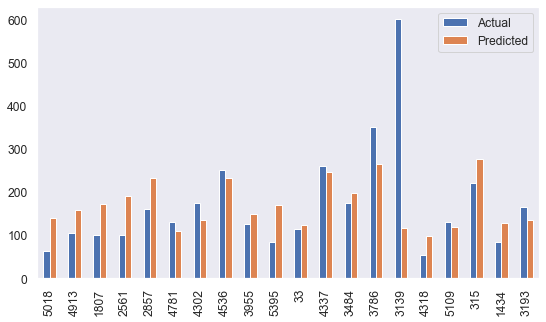

In [81]:
#first20pred
df2 = df1.head(20)
df2.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

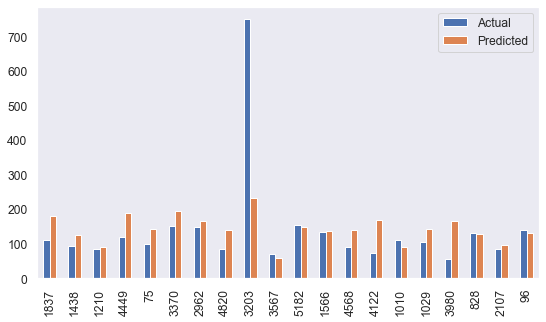

In [82]:
#last20pred
df2 = df1.tail(20)
df2.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# K-Nearest Neighbor Classification

In [83]:
conditions = [
    (data['price'] < 100.0),
    (data['price'] >= 100.0) & (data['price'] < 250.0),
    (data['price'] >= 250.0) & (data['price'] < 600.0),
    (data['price'] >= 600.0) ]

values = ['economic', 'low-mid', 'high-mid','high']

data['price_range'] = np.select(conditions, values)

In [84]:
data['price_range'].value_counts()

low-mid     3225
economic    1346
high-mid     775
high          56
Name: price_range, dtype: int64

In [85]:
labelencoder = LabelEncoder()
data['price_range_category'] = labelencoder.fit_transform(data['price_range'])

In [86]:
df3 = data[['id', 'accommodates', 'bedrooms', 'price', 'price_range_category',
       'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room']]

In [87]:
df3.corr().style.background_gradient(cmap='magma')

,id,accommodates,bedrooms,price,price_range_category,number_of_reviews,logreviews,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
id,1.000000,-0.033858,-0.086076,0.027316,0.012117,-0.396302,-0.633907,-0.080770,0.036610,0.069570,0.019722
accommodates,-0.033858,1.000000,0.724159,0.352095,0.177402,-0.091468,-0.064605,0.267582,-0.069316,-0.251836,-0.008614
bedrooms,-0.086076,0.724159,1.000000,0.344000,0.178828,-0.164017,-0.132286,0.334627,-0.070536,-0.316915,-0.029752
price,0.027316,0.352095,0.344000,1.000000,0.141866,-0.136287,-0.147404,0.200361,-0.027251,-0.193440,-0.020899
price_range_category,0.012117,0.177402,0.178828,0.141866,1.000000,-0.221056,-0.171781,0.404195,-0.027513,-0.395614,-0.058601
number_of_reviews,-0.396302,-0.091468,-0.164017,-0.136287,-0.221056,1.000000,0.722738,-0.354139,0.021957,0.349760,0.031272
logreviews,-0.633907,-0.064605,-0.132286,-0.147404,-0.171781,0.722738,1.000000,-0.290475,0.022917,0.287963,0.006678
room_type_Entire home/apt,-0.080770,0.267582,0.334627,0.200361,0.404195,-0.354139,-0.290475,1.000000,-0.180683,-0.955961,-0.083416
room_type_Hotel room,0.036610,-0.069316,-0.070536,-0.027251,-0.027513,0.021957,0.022917,-0.180683,1.000000,-0.087616,-0.007645
room_type_Private room,0.069570,-0.251836,-0.316915,-0.193440,-0.395614,0.349760,0.287963,-0.955961,-0.087616,1.000000,-0.040450


In [88]:
neigh = KNeighborsClassifier(n_neighbors=3)

X1 = df3.iloc[:, :-1].values
y1 = df3['price_range_category'].values

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20, random_state=42) 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [89]:
y_pred1 = neigh.predict(X_test)

In [90]:
KNNmod = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred1.flatten()})
KNNmod

,Actual,Predicted
0,0,0
1,3,3
2,3,3
3,3,3
4,3,3
...,...,...
1076,3,3
1077,0,0
1078,3,3
1079,0,0


In [91]:
#Accuracy of the model.
print(neigh.score(X_test, y_test)) 

0.996299722479186


In [92]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 0.0037002775208140612
Mean Squared Error: 0.0037002775208140612
Root Mean Squared Error: 0.060829906467247355


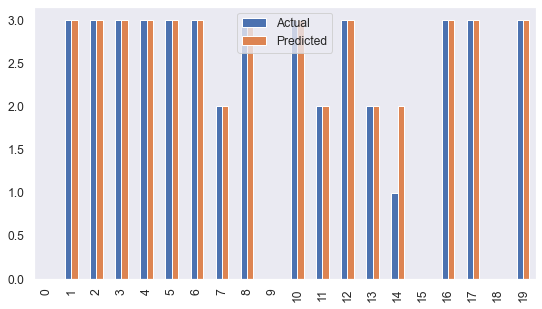

In [93]:
#first20pred
df4 = KNNmod.head(20)
df4.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

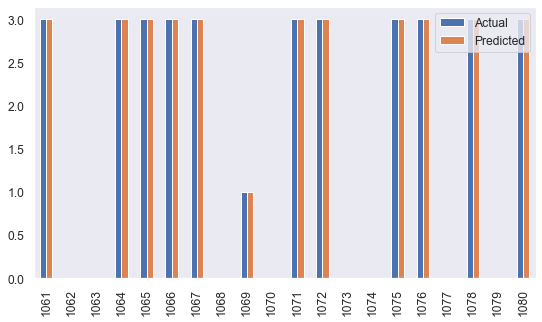

In [94]:
#last20pred
df4 = KNNmod.tail(20)
df4.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [95]:
print(classification_report(y_test, y_pred1, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      0.83      0.91        12
           2       0.99      0.99      0.99       142
           3       1.00      1.00      1.00       661

    accuracy                           1.00      1081
   macro avg       1.00      0.95      0.97      1081
weighted avg       1.00      1.00      1.00      1081



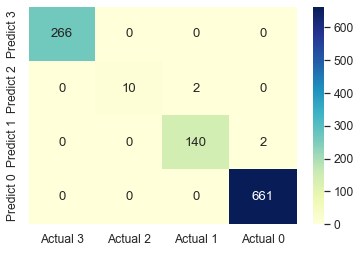

In [96]:
cm = confusion_matrix(y_test, y_pred1)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [97]:
y_pred1 = neigh.predict(X_test)

In [98]:
len(y_pred1)

1081

In [99]:
y_pred1

array([0, 3, 3, ..., 3, 0, 3])

In [100]:
y_prob_pred = neigh.predict_proba(X_test)

In [101]:
len(y_prob_pred)

1081

In [102]:
y_prob_pred

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [103]:
#AUC ROC Score.
roc_auc_score(y_test, y_prob_pred, multi_class='ovo', average='weighted')

0.9917708333381242

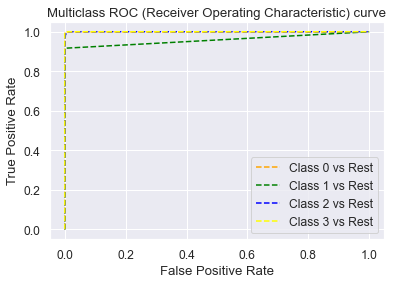

In [104]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 

Text(0.5, 1.0, 'Outliers')

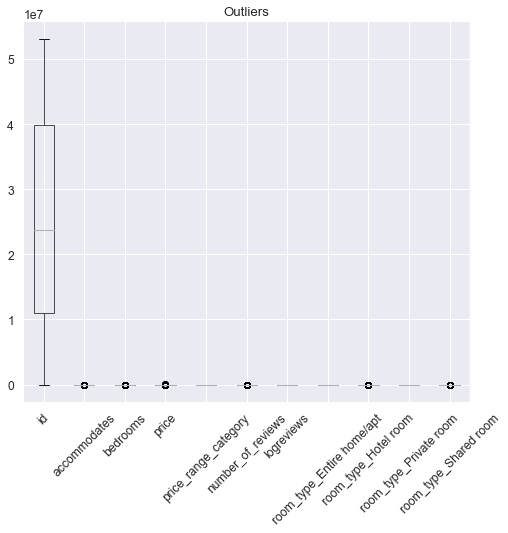

In [105]:
boxplot1 = df3.boxplot(figsize=(8,7),rot=45)
plt.title('Outliers')

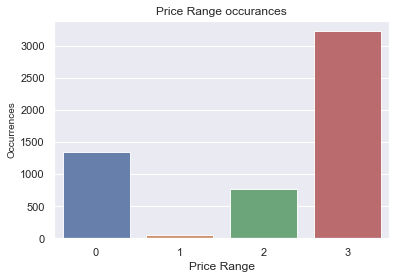

In [106]:
prange_count = df3['price_range_category'].value_counts()
sns.set(style="darkgrid")
sns.barplot(prange_count.index, prange_count.values, alpha=0.9)
plt.title('Price Range occurances')
plt.ylabel('Occurrences', fontsize=10)
plt.xlabel('Price Range', fontsize=12)
plt.show()

#  Naive Bayes Classification

In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, GridSearchCV 
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred2_train = gnb.predict(X_train)
y_pred2_test = gnb.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,gnb.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,gnb.predict(X_test)),4)))

Training Accuracy score: 1.0
Testing Accuracy score: 1.0


In [108]:
df5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2_test.flatten()})
df5

,Actual,Predicted
0,0,0
1,3,3
2,3,3
3,3,3
4,3,3
...,...,...
1076,3,3
1077,0,0
1078,3,3
1079,0,0


In [109]:
#Accuracy of the model.
accuracy_score(y_test, y_pred2_test)

1.0

In [110]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred2_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred2_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred2_test)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


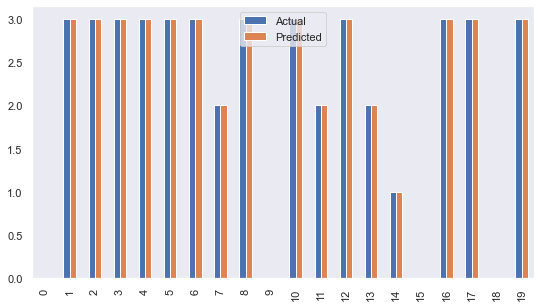

In [111]:
#first20pred
df6 = df5.head(20)
df6.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

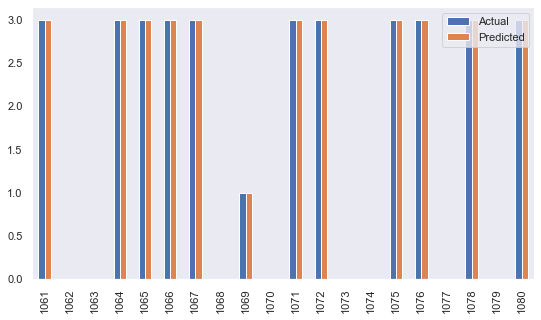

In [112]:
#last20pred
df6 = df5.tail(20)
df6.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [113]:
print(classification_report(y_test, y_pred2_test, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00       142
           3       1.00      1.00      1.00       661

    accuracy                           1.00      1081
   macro avg       1.00      1.00      1.00      1081
weighted avg       1.00      1.00      1.00      1081



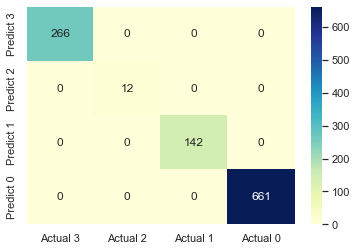

In [114]:
cm = confusion_matrix(y_test, y_pred2_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [115]:
y_pred2_test = gnb.predict(X_test)

In [116]:
len(y_pred2_test)

1081

In [117]:
y_pred2_test

array([0, 3, 3, ..., 3, 0, 3])

In [118]:
y_prob_pred1 = gnb.predict_proba(X_test)

In [119]:
y_prob_pred1

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [120]:
len(y_prob_pred1)

1081

In [121]:
a = np.array(y_prob_pred1)
b = np.zeros_like(a)
b[np.arange(len(a)), a.argmax(1)] = 1
b

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [122]:
#AUC ROC Score.
roc_auc_score(y_pred2_test, b, multi_class='ovo', average='weighted')

1.0

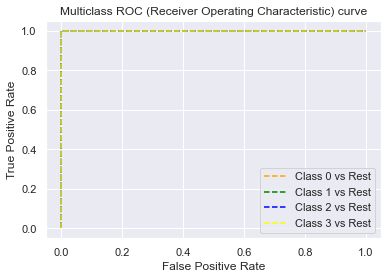

In [123]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_pred2_test, y_prob_pred1[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 

# Random Forest Classification

In [124]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20, random_state=42) 
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred3_train = clf.predict(X_train)
y_pred3_test = clf.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,clf.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,clf.predict(X_test)),4)))

Training Accuracy score: 1.0
Testing Accuracy score: 1.0


In [125]:
df7 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3_test.flatten()})
df7

,Actual,Predicted
0,0,0
1,3,3
2,3,3
3,3,3
4,3,3
...,...,...
1076,3,3
1077,0,0
1078,3,3
1079,0,0


In [126]:
#Accuracy of the model.
accuracy_score(y_test, y_pred3_test)

1.0

In [127]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred3_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred3_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred3_test)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


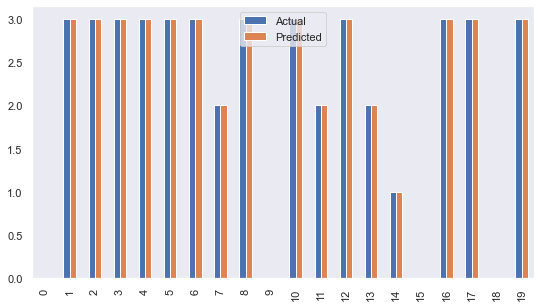

In [128]:
#first20pred
df8 = df7.head(20)
df8.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

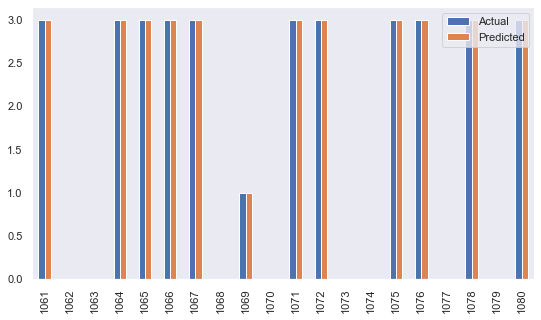

In [129]:
#last20pred
df8 = df7.tail(20)
df8.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [130]:
print(classification_report(y_test, y_pred3_test, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00       142
           3       1.00      1.00      1.00       661

    accuracy                           1.00      1081
   macro avg       1.00      1.00      1.00      1081
weighted avg       1.00      1.00      1.00      1081



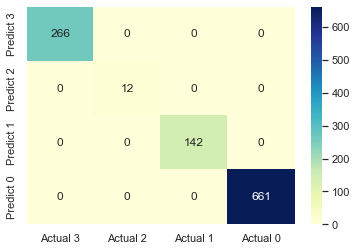

In [131]:
cm = confusion_matrix(y_test, y_pred3_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [132]:
y_pred3_test = clf.predict(X_test)

In [133]:
#AUC ROC Score.
y_prob_pred2 = clf.predict_proba(X_test)
roc_auc_score(y_pred3_test, y_prob_pred2, multi_class='ovo', average='weighted')

1.0

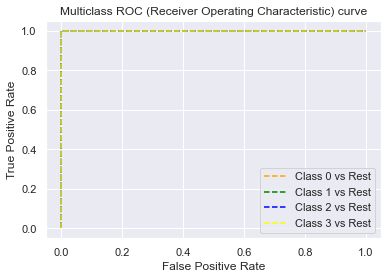

In [134]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_pred3_test, y_prob_pred2[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 

# Decision Tree Classification

In [135]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
X2 = data[['id', 'accommodates', 'bedrooms', 'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
          'room_type_Hotel room', 'room_type_Private room',
          'room_type_Shared room']]
y2 = data['price_range_category']
X_train,X_test,y_train,y_test=train_test_split(X2, y2, test_size=0.20, random_state=42)

In [136]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)
y_pred4 = dt.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,dt.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,dt.predict(X_test)),4)))

Training Accuracy score: 1.0
Testing Accuracy score: 0.593


In [137]:
Treedata=data[['id', 'accommodates', 'bedrooms', 'price', 'price_range_category',
       'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room']]

In [138]:
from sklearn import tree
from sklearn.tree import plot_tree

feature_cols = ['id', 'accommodates', 'bedrooms',
       'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room']
X3 = Treedata[feature_cols].values # Features
y3 = Treedata.price_range_category.values # Target variable

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.20,random_state = 42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_scaled,y_train)
y_pred5 = clf.predict(X_test)

In [141]:
print("Accuracy:", accuracy_score(y_test, y_pred5))

Accuracy: 0.1461609620721554


In [142]:
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred5))

Root Mean Squared Error: 1.7826086956521738


In [143]:
Treecls = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred5.flatten()})
Treecls

,Actual,Predicted
0,0,2
1,3,2
2,3,2
3,3,2
4,3,2
...,...,...
1076,3,2
1077,0,2
1078,3,2
1079,0,2


In [144]:
#Accuracy of the model.
accuracy_score(y_test, y_pred5)

0.1461609620721554

In [145]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred5))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred5))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred5)))

Mean Absolute Error: 1.1480111008325624
Mean Squared Error: 1.7826086956521738
Root Mean Squared Error: 1.335143698502964


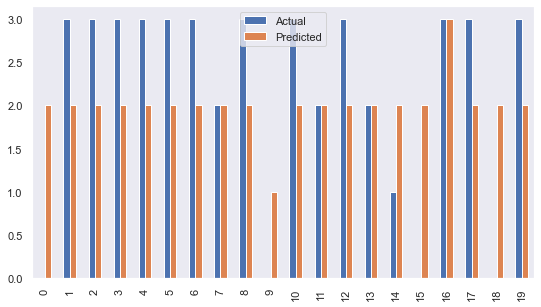

In [146]:
#first20pred
df9 = Treecls.head(20)
df9.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

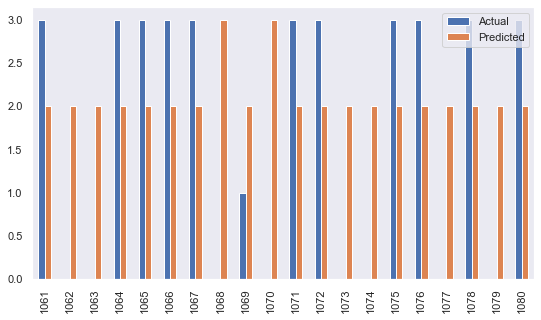

In [147]:
#last20pred
df9 = Treecls.tail(20)
df9.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [148]:
print(classification_report(y_test, y_pred5, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       266
           1       0.03      0.17      0.06        12
           2       0.13      0.87      0.22       142
           3       0.55      0.05      0.09       661

    accuracy                           0.15      1081
   macro avg       0.18      0.27      0.09      1081
weighted avg       0.35      0.15      0.08      1081



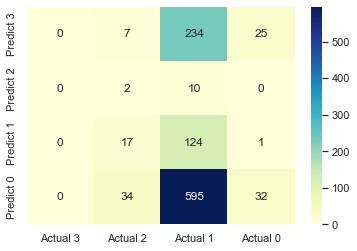

In [149]:
cm = confusion_matrix(y_test, y_pred5)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [150]:
y_pred5 = dt.predict(X_test)

In [151]:
#AUC ROC Score.
y_prob_pred3 = dt.predict_proba(X_test)
roc_auc_score(y_pred5, y_prob_pred3, multi_class='ovo', average='weighted')

1.0

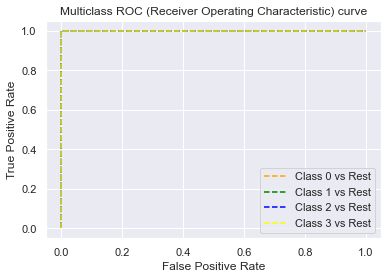

In [152]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_pred5, y_prob_pred3[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 

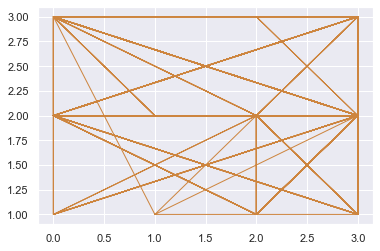

In [153]:
a=Treecls.Actual
b=Treecls.Predicted
plt.plot(a, b, color='peru', linewidth=1)
plt.show()

# Ensembling (Voting Classification)

In [154]:
from sklearn.ensemble import VotingClassifier

classifiers = [('KNN', neigh), ('Random Forest', clf), ('Decision Tree', dt), ('Naive Bayes', gnb)]
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)

print("Training Accuracy score: "+str(round(accuracy_score(y_train,vc.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,vc.predict(X_test)),4)))

Training Accuracy score: 1.0
Testing Accuracy score: 0.6096


In [155]:
y_pred6 = vc.predict(X_test)

In [156]:
df10 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred6.flatten()})
df10

,Actual,Predicted
0,0,0
1,3,3
2,3,3
3,3,3
4,3,3
...,...,...
1076,3,0
1077,0,3
1078,3,3
1079,0,0


In [157]:
#Accuracy of the model.
accuracy_score(y_test, y_pred6)

0.6096207215541165

In [158]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred6))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred6))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred6)))

Mean Absolute Error: 0.8214616096207216
Mean Squared Error: 2.0832562442183162
Root Mean Squared Error: 1.443348968274241


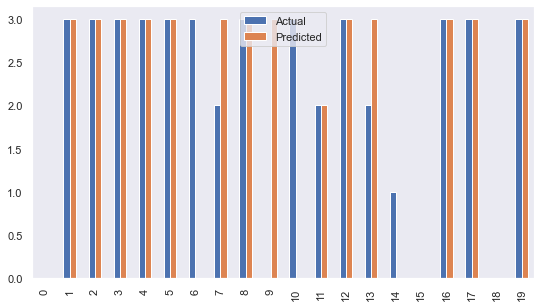

In [159]:
#first20pred
df11 = df10.head(20)
df11.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

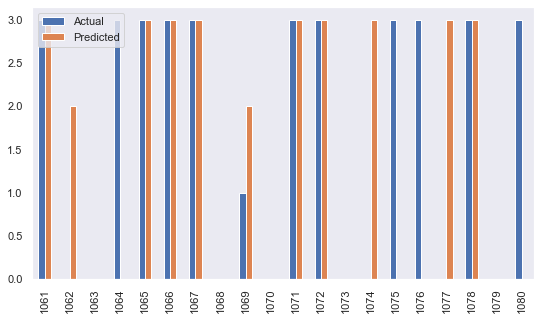

In [160]:
#last20pred
df11 = df10.tail(20)
df11.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [161]:
print(classification_report(y_test, y_pred6, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       0.55      0.52      0.54       266
           1       0.12      0.08      0.10        12
           2       0.32      0.32      0.32       142
           3       0.70      0.72      0.71       661

    accuracy                           0.61      1081
   macro avg       0.42      0.41      0.42      1081
weighted avg       0.61      0.61      0.61      1081



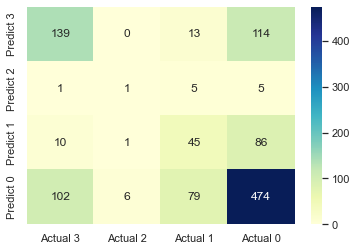

In [162]:
cm = confusion_matrix(y_test, y_pred6)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [163]:
#AUC ROC Score.
y_prob_pred3 = dt.predict_proba(X_test)
roc_auc_score(y_pred6, y_prob_pred3, multi_class='ovo', average='weighted')

0.9827184682077351

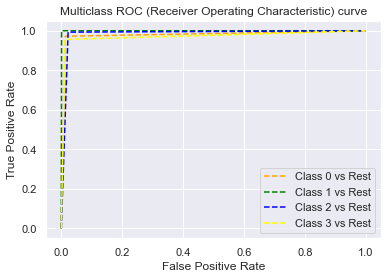

In [164]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_pred6, y_prob_pred3[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 